### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [514]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [515]:
data = pd.read_csv('data/coupons.csv')

In [516]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [517]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [518]:
data.count()

destination             12684
passanger               12684
weather                 12684
temperature             12684
time                    12684
coupon                  12684
expiration              12684
gender                  12684
age                     12684
maritalStatus           12684
has_children            12684
education               12684
occupation              12684
income                  12684
car                       108
Bar                     12577
CoffeeHouse             12467
CarryAway               12533
RestaurantLessThan20    12554
Restaurant20To50        12495
toCoupon_GEQ5min        12684
toCoupon_GEQ15min       12684
toCoupon_GEQ25min       12684
direction_same          12684
direction_opp           12684
Y                       12684
dtype: int64

In [519]:
data.isnull().sum() / data.shape[0] * 100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

In [520]:
data.destination.value_counts()

No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64

In [521]:
data.passanger.value_counts()

Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64

In [522]:
data.weather.value_counts()

Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64

In [523]:
data.temperature.value_counts()

80    6528
55    3840
30    2316
Name: temperature, dtype: int64

In [524]:
data.time.value_counts()

6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64

In [525]:
data.coupon.value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

In [526]:
data.expiration.value_counts()

1d    7091
2h    5593
Name: expiration, dtype: int64

In [527]:
data.gender.value_counts()

Female    6511
Male      6173
Name: gender, dtype: int64

## Cleaning

```
1. Turning 50plus values into 50
2. Turning below21 values into 20
3. Turning age into numeric
```

In [528]:
data.loc[data["age"]=="50plus","age"] = "50"
data.loc[data["age"]=="below21","age"] = "20"
data["age"] = pd.to_numeric(data["age"])
data.age.value_counts()

21    2653
26    2559
31    2039
50    1788
36    1319
41    1093
46     686
20     547
Name: age, dtype: int64

In [529]:
data.maritalStatus.value_counts()

Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: maritalStatus, dtype: int64

In [530]:
data.has_children.value_counts()

0    7431
1    5253
Name: has_children, dtype: int64

In [531]:
data.education.value_counts()

Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: education, dtype: int64

In [532]:
data.occupation.value_counts()

Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science                  170


In [533]:
data.income.value_counts()

$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64

In [534]:
data.car.value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

In [535]:
data.Bar.value_counts()

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [536]:
data.CoffeeHouse.value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [537]:
data.CarryAway.value_counts()

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

In [538]:
data.RestaurantLessThan20.value_counts()

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

In [539]:
data.Restaurant20To50.value_counts()

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

In [540]:
data.toCoupon_GEQ5min.value_counts()

1    12684
Name: toCoupon_GEQ5min, dtype: int64

In [541]:
data.toCoupon_GEQ15min.value_counts()

1    7122
0    5562
Name: toCoupon_GEQ15min, dtype: int64

In [542]:
data.toCoupon_GEQ25min.value_counts()

0    11173
1     1511
Name: toCoupon_GEQ25min, dtype: int64

In [543]:
data.direction_same.value_counts()

0    9960
1    2724
Name: direction_same, dtype: int64

In [544]:
data.direction_opp.value_counts()

1    9960
0    2724
Name: direction_opp, dtype: int64

In [545]:
data.Y.value_counts()

1    7210
0    5474
Name: Y, dtype: int64

In [546]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  int64 
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [547]:
data.drop("car", axis=1, inplace=True)

4. What proportion of the total observations chose to accept the coupon? 



In [548]:
data.Y.value_counts() / data.Y.count() * 100

1    56.843267
0    43.156733
Name: Y, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

In [549]:
px.bar(data["coupon"])

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

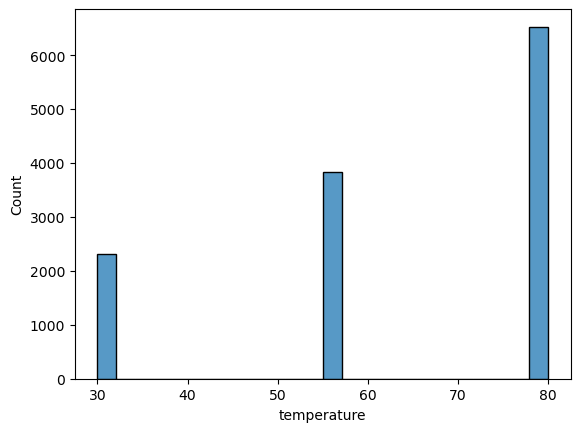

In [550]:
sns.histplot(data["temperature"])

In [551]:
px.histogram(data["temperature"])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [552]:
df_bar = data.query('coupon == "Bar"')

2. What proportion of bar coupons were accepted?


In [553]:
df_bar["Y"].value_counts() / df_bar["Y"].count() * 100

0    58.998513
1    41.001487
Name: Y, dtype: float64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [554]:
px.histogram(df_bar, x="Bar", color="Y")

In [555]:
df_bar.groupby(["Bar","Y"])["Bar","Y"].count() / df_bar.groupby("Bar")[["Bar"]].count() * 100

/var/folders/dy/mqrlzklx5s17wl5wc4bfrw4w0000gp/T/ipykernel_71892/3747738656.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Bar   Y
Bar   Y               
1~3   0  35.264484 NaN
      1  64.735516 NaN
4~8   0  22.000000 NaN
      1  78.000000 NaN
gt8   0  26.530612 NaN
      1  73.469388 NaN
less1 0  55.614035 NaN
      1  44.385965 NaN
never 0  81.204819 NaN
      1  18.795181 NaN

In [556]:
df_bar.groupby("Bar")["Bar"].count()

Bar
1~3      397
4~8      150
gt8       49
less1    570
never    830
Name: Bar, dtype: int64

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [557]:
df_bar.query("Bar in ('1~3','less1','4~8','gt8') and age >= 25").groupby("Y")["Bar"].count()

Y
0    395
1    475
Name: Bar, dtype: int64

In [558]:
px.bar(df_bar.query("Bar in ('1~3','less1','4~8','gt8') and age >= 25").groupby("Y")["Bar"].count())

In [559]:
df_bar.query("Bar in ('1~3','less1','4~8','gt8') and age >= 25").groupby("Y")["Bar"].count() / df_bar.query("Bar in ('1~3','less1','4~8','gt8') and age >= 25")["Bar"].count() * 100

Y
0    45.402299
1    54.597701
Name: Bar, dtype: float64

In [560]:
px.histogram(df_bar.query("Bar in ('1~3','less1','4~8','gt8') and age >= 25"), x="Bar", color="Y")

In [561]:
df_bar.query("Bar in ('1~3','less1','4~8','gt8') and age >= 25").groupby(["Bar","Y"])["Bar","Y"].count() / df_bar.query("Bar in ('1~3','less1','4~8','gt8') and age >= 25").groupby("Bar")[["Bar"]].count() * 100

/var/folders/dy/mqrlzklx5s17wl5wc4bfrw4w0000gp/T/ipykernel_71892/1321499540.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Bar   Y
Bar   Y               
1~3   0  34.154930 NaN
      1  65.845070 NaN
4~8   0  20.754717 NaN
      1  79.245283 NaN
gt8   0  30.000000 NaN
      1  70.000000 NaN
less1 0  59.333333 NaN
      1  40.666667 NaN

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [562]:
px.bar(df_bar.query("Bar in ('1~3','less1','4~8','gt8') and passanger in ('Friend(s)','Partner') and occupation not in ('farming','fishing','forestry')").groupby("Y")["Bar"].count())

In [563]:
df_bar.query("Bar in ('1~3','less1','4~8','gt8') and passanger in ('Friend(s)','Partner') and occupation not in ('farming','fishing','forestry')").groupby("Y")["Bar"].count() / df_bar.query("Bar in ('1~3','less1','4~8','gt8') and passanger in ('Friend(s)','Partner') and occupation not in ('farming','fishing','forestry')")["Bar"].count() * 100

Y
0    36.842105
1    63.157895
Name: Bar, dtype: float64

In [564]:
px.histogram(df_bar.query("Bar in ('1~3','less1','4~8','gt8') and passanger in ('Friend(s)','Partner') and occupation not in ('farming','fishing','forestry')"), x="Bar", color="Y")

In [565]:
df_bar.query("Bar in ('1~3','less1','4~8','gt8') and passanger in ('Friend(s)','Partner') and occupation not in ('farming','fishing','forestry')").groupby(["Bar","Y"])[["Bar"]].count() / df_bar.query("Bar in ('1~3','less1','4~8','gt8') and passanger in ('Friend(s)','Partner') and occupation not in ('farming','fishing','forestry')").groupby("Bar")[["Bar"]].count() * 100

Bar
Bar   Y           
1~3   0  27.819549
      1  72.180451
4~8   0  28.571429
      1  71.428571
gt8   0  30.000000
      1  70.000000
less1 0  45.945946
      1  54.054054

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [566]:
df_options1 = df_bar.query("Bar in ('1~3','less1','4~8','gt8') and passanger in ('Friend(s)','Partner') and maritalStatus != 'Widowed'").groupby("Y").count()[["Bar"]] / df_bar.query("Bar in ('1~3','less1','4~8','gt8') and passanger in ('Friend(s)','Partner') and maritalStatus != 'Widowed'")["Bar"].count() * 100
px.bar(df_options1)

In [567]:
df_options2 = df_bar.query("Bar in ('1~3','less1','4~8','gt8') and age < 30").groupby("Y").count()[["Bar"]] / df_bar.query("Bar in ('1~3','less1','4~8','gt8') and age < 30")["Bar"].count()
px.bar(df_options2)

In [568]:
df_options3 = df_bar.query("RestaurantLessThan20 in ('4~8','gt8') and income in ('Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999')").groupby("Y").count()[["Bar"]] / df_bar.query("RestaurantLessThan20 in ('4~8','gt8') and income in ('Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999')")["Bar"].count() * 100
px.bar(df_options3)

In [569]:
df_bar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 9 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   int64 
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  Bar                   1996 non-null   object
 15  CoffeeHouse           1978 non-null  

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## Hypotheses

```
1. People that are used to go to bars are more inclined to accept a coupon to go to bar. Specially if they young (<30 age) and have someone to go with (no kids);
2. People that do not make a lot of money (<50k income) are more inclined to accept a coupon. Specially those already accostumated to go out to popular restaurants (<20);
```

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Investigating "Coffee House"

In [572]:
df_coffee_house = data.query("coupon == 'Coffee House'")
df_coffee_house.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


### Exploring Individual relations between single dimensions with the Y

In [613]:
df_coffee_house.groupby(["Y","destination"])[["destination"]].count() / df_coffee_house.shape[0] * 100
# No Urgent Place

destination
Y destination                 
0 Home               14.814815
  No Urgent Place    22.597598
  Work               12.662663
1 Home                8.408408
  No Urgent Place    31.331331
  Work               10.185185

In [614]:
df_coffee_house.groupby(["Y","passanger"])[["passanger"]].count() / df_coffee_house.shape[0] * 100
# Having friends

passanger
Y passanger           
0 Alone      31.731732
  Friend(s)  12.387387
  Kid(s)      2.677678
  Partner     3.278278
1 Alone      24.724725
  Friend(s)  18.343343
  Kid(s)      2.502503
  Partner     4.354354

In [615]:
df_coffee_house.groupby(["Y","weather"])[["weather"]].count() / df_coffee_house.shape[0] * 100

weather
Y weather           
0 Rainy     2.702703
  Snowy     4.304304
  Sunny    43.068068
1 Rainy     2.952953
  Snowy     3.278278
  Sunny    43.693694

In [616]:
df_coffee_house.groupby(["Y","temperature"])[["temperature"]].count() / df_coffee_house.shape[0] * 100
# Maybe 80

temperature
Y temperature             
0 30              4.429429
  55             17.392392
  80             28.253253
1 30              3.528529
  55             14.564565
  80             31.831832

In [630]:
df_coffee_house.groupby(["Y","time"])[["time"]].count() / df_coffee_house.shape[0] * 100
# Morning is better 10AM,2PM, 

time
Y time           
0 10AM   8.083083
  10PM   4.279279
  2PM    8.983984
  6PM   16.066066
  7AM   12.662663
1 10AM  14.414414
  10PM   3.153153
  2PM   10.885886
  6PM   11.286286
  7AM   10.185185

In [617]:
df_coffee_house.groupby(["Y","expiration"])[["expiration"]].count() / df_coffee_house.shape[0]
# 1 day

expiration
Y expiration            
0 1d            0.184184
  2h            0.316567
1 1d            0.258509
  2h            0.240741

In [629]:
df_coffee_house.groupby(["Y","gender"])[["gender"]].count() / df_coffee_house.shape[0] * 100


gender
Y gender           
0 Female  26.051051
  Male    24.024024
1 Female  25.275275
  Male    24.649650

In [628]:
df_coffee_house.groupby(["Y","age"])[["age"]].count() / df_coffee_house.shape[0] * 100
# Maybe 21, 20, 26

age
Y age           
0 20    1.176176
  21   10.510511
  26   10.235235
  31    8.158158
  36    5.355355
  41    4.054054
  46    2.677678
  50    7.907908
1 20    2.702703
  21   11.586587
  26   10.860861
  31    7.432432
  36    4.704705
  41    4.079079
  46    2.827828
  50    5.730731

In [627]:
df_coffee_house.groupby(["Y","maritalStatus"])[["maritalStatus"]].count() / df_coffee_house.shape[0] * 100
# Maybe Single

maritalStatus
Y maritalStatus                   
0 Divorced                1.801802
  Married partner        19.544545
  Single                 18.768769
  Unmarried partner       9.359359
  Widowed                 0.600601
1 Divorced                1.976977
  Married partner        19.019019
  Single                 20.020020
  Unmarried partner       8.583584
  Widowed                 0.325325

In [625]:
df_coffee_house.groupby(["Y","has_children"])[["has_children"]].count() / df_coffee_house.shape[0] * 100


has_children
Y has_children              
0 0                30.230230
  1                19.844845
1 0                30.980981
  1                18.943944

In [626]:
df_coffee_house.groupby(["Y","education"])[["education"]].count() / df_coffee_house.shape[0] * 100


education
Y education                                        
0 Associates degree                        4.229229
  Bachelors degree                        18.418418
  Graduate degree (Masters or Doctorate)   7.332332
  High School Graduate                     3.203203
  Some High School                         0.275275
  Some college - no degree                16.616617
1 Associates degree                        4.529530
  Bachelors degree                        15.865866
  Graduate degree (Masters or Doctorate)   7.632633
  High School Graduate                     3.778779
  Some High School                         0.425425
  Some college - no degree                17.692693

In [624]:
df_coffee_house.groupby(["Y","occupation"])[["occupation"]].count() / df_coffee_house.shape[0] * 100
# Student, Transportation & Material Moving, Unemployed, Installation Maintenance & Repair, Healthcare Support, Healthcare Practitioners & Technical, Building & Grounds Cleaning & Maintenance

occupation
Y occupation                                           
0 Architecture & Engineering                   0.700701
  Arts Design Entertainment Sports & Media     2.577578
  Building & Grounds Cleaning & Maintenance    0.075075
  Business & Financial                         1.901902
  Community & Social Services                  1.201201
  Computer & Mathematical                      5.580581
  Construction & Extraction                    0.600601
  Education&Training&Library                   4.179179
  Farming Fishing & Forestry                   0.125125
  Food Preparation & Serving Related           1.151151
  Healthcare Practitioners & Technical         0.475475
  Healthcare Support                           0.625626
  Installation Maintenance & Repair            0.475475
  Legal                                        1.076076
  Life Physical Social Science                 0.800801
  Management                                   4.054054
  Office & Administrative Support              2.802803
  Personal Care & Service                      0.625626
  Production Occupations                       0.450450
  Protective Service                           0.800801
  Retired                                      2.452452
  Sales & Related                              5.405405
  Student                                      4.679680
  Transportation & Material Moving             0.725726
  Unemployed                                   6.531532
1 Architecture & Engineering                   0.875876
  Arts Design Entertainment Sports & Media     2.652653
  Building & Grounds Cleaning & Maintenance    0.200200
  Business & Financial                         1.751752
  Community & Social Services                  0.650651
  Computer & Mathematical                      5.655656
  Construction & Extraction                    0.550551
  Education&Training&Library                   3.228228
  Farming Fishing & Forestry                   0.150150
  Food Preparation & Serving Related           0.925926
  Healthcare Practitioners & Technical         1.376376
  Healthcare Support                           1.001001
  Installation Maintenance & Repair            0.625626
  Legal                                        0.650651
  Life Physical Social Science                 0.725726
  Management                                   3.403403
  Office & Administrative Support              2.127127
  Personal Care & Service                      0.625626
  Production Occupations                       0.250250
  Protective Service                           0.650651
  Retired                                      1.651652
  Sales & Related                              3.478478
  Student                                      7.807808
  Transportation & Material Moving             1.176176
  Unemployed                                   7.732733

In [634]:
df_coffee_house.groupby(["Y","income"])[["income"]].count() / df_coffee_house.shape[0] * 100
# Less than $12500, 87500−99999, 37500−49999, 

income
Y income                    
0 $100000 or More   6.756757
  $12500 - $24999   6.831832
  $25000 - $37499   8.433433
  $37500 - $49999   6.756757
  $50000 - $62499   6.806807
  $62500 - $74999   3.878879
  $75000 - $87499   4.154154
  $87500 - $99999   3.003003
  Less than $12500  3.453453
1 $100000 or More   6.606607
  $12500 - $24999   8.033033
  $25000 - $37499   7.582583
  $37500 - $49999   8.008008
  $50000 - $62499   6.906907
  $62500 - $74999   3.003003
  $75000 - $87499   1.751752
  $87500 - $99999   3.778779
  Less than $12500  4.254254

In [635]:
df_coffee_house.groupby(["Y","Bar"])[["Bar"]].count() / df_coffee_house.shape[0] * 100


Bar
Y Bar             
0 1~3     9.559560
  4~8     4.404404
  gt8     1.551552
  less1  13.313313
  never  20.870871
1 1~3     9.509510
  4~8     4.854855
  gt8     1.276276
  less1  13.663664
  never  20.070070

In [636]:
df_coffee_house.groupby(["Y","CoffeeHouse"])[["CoffeeHouse"]].count() / df_coffee_house.shape[0] * 100
# 1~3, 4~8, gt8, 

CoffeeHouse
Y CoffeeHouse             
0 1~3             9.184184
  4~8             4.229229
  gt8             2.927928
  less1          13.938939
  never          18.818819
1 1~3            16.891892
  4~8             9.234234
  gt8             5.630631
  less1          12.962963
  never           4.379379

In [637]:
df_coffee_house.groupby(["Y","CarryAway"])[["CarryAway"]].count() / df_coffee_house.shape[0] * 100


CarryAway
Y CarryAway           
0 1~3        18.218218
  4~8        16.416416
  gt8         6.006006
  less1       8.283283
  never       0.575576
1 1~3        19.219219
  4~8        17.142142
  gt8         6.131131
  less1       6.081081
  never       0.500501

In [638]:
df_coffee_house.groupby(["Y","RestaurantLessThan20"])[["RestaurantLessThan20"]].count() / df_coffee_house.shape[0] * 100
# 

RestaurantLessThan20
Y RestaurantLessThan20                      
0 1~3                              20.970971
  4~8                              13.813814
  gt8                               5.155155
  less1                             8.933934
  never                             0.750751
1 1~3                              21.046046
  4~8                              14.589590
  gt8                               5.630631
  less1                             7.307307
  never                             0.550551

In [639]:
df_coffee_house.groupby(["Y","Restaurant20To50"])[["Restaurant20To50"]].count() / df_coffee_house.shape[0] * 100
# 1~3, 4~8, gt8, 

Restaurant20To50
Y Restaurant20To50                  
0 1~3                      12.887888
  4~8                       2.077077
  gt8                       0.825826
  less1                    23.348348
  never                    10.260260
1 1~3                      13.763764
  4~8                       2.777778
  gt8                       1.451451
  less1                    23.423423
  never                     7.807808

In [640]:
df_coffee_house.groupby(["Y","toCoupon_GEQ5min"])[["toCoupon_GEQ5min"]].count() / df_coffee_house.shape[0] * 100


,,toCoupon_GEQ5min
Y,toCoupon_GEQ5min,
0,1,50.075075
1,1,49.924925


In [641]:
df_coffee_house.groupby(["Y","toCoupon_GEQ15min"])[["toCoupon_GEQ15min"]].count() / df_coffee_house.shape[0] * 100
# 0

toCoupon_GEQ15min
Y toCoupon_GEQ15min                   
0 0                          21.746747
  1                          28.328328
1 0                          26.376376
  1                          23.548549

In [642]:
df_coffee_house.groupby(["Y","toCoupon_GEQ25min"])[["toCoupon_GEQ25min"]].count() / df_coffee_house.shape[0] * 100
# 0

toCoupon_GEQ25min
Y toCoupon_GEQ25min                   
0 0                          44.994995
  1                           5.080080
1 0                          47.247247
  1                           2.677678

In [643]:
df_coffee_house.groupby(["Y","direction_same"])[["direction_same"]].count() / df_coffee_house.shape[0] * 100
# 1

direction_same
Y direction_same                
0 0                    41.266266
  1                     8.808809
1 0                    39.964965
  1                     9.959960

In [644]:
df_coffee_house.groupby(["Y","direction_opp"])[["direction_opp"]].count() / df_coffee_house.shape[0] * 100
# 0

direction_opp
Y direction_opp               
0 0                   8.808809
  1                  41.266266
1 0                   9.959960
  1                  39.964965

### Visualizing the Data

In [705]:
grp_dest_df = df_coffee_house.groupby(["Y","destination"])[["passanger"]].count().rename(columns={"passanger":"count"}).reset_index()
px.bar(grp_dest_df, x="destination", y="count", color="Y")

In [707]:
grp_dest_df = df_coffee_house.groupby(["Y","passanger"])[["destination"]].count().rename(columns={"destination":"count"}).reset_index()
px.bar(grp_dest_df, x="passanger", y="count", color="Y")

In [708]:
grp_dest_df = df_coffee_house.groupby(["Y","time"])[["destination"]].count().rename(columns={"destination":"count"}).reset_index()
px.bar(grp_dest_df, x="time", y="count", color="Y")

In [709]:
grp_dest_df = df_coffee_house.groupby(["Y","expiration"])[["destination"]].count().rename(columns={"destination":"count"}).reset_index()
px.bar(grp_dest_df, x="expiration", y="count", color="Y")

In [710]:
grp_dest_df = df_coffee_house.groupby(["Y","CoffeeHouse"])[["destination"]].count().rename(columns={"destination":"count"}).reset_index()
px.bar(grp_dest_df, x="CoffeeHouse", y="count", color="Y")

#### People that frequent coffee houses and had not urgent destination had 73.5% acceptance rate

In [721]:
num_rows = df_coffee_house.query("CoffeeHouse in ('1˜3','4˜8','gt8') and destination == 'No Urgent Place'")["destination"].count() 
df_coffee_house.query("CoffeeHouse in ('1˜3','4˜8','gt8') and destination == 'No Urgent Place'").groupby("Y")["destination"].count() / num_rows * 100

Y
0    26.436782
1    73.563218
Name: destination, dtype: float64

#### People that frequent coffee houses and had not urgent destination and the expiration of the coupon was 1 day had 86.9% acceptance rate

In [722]:
num_rows = df_coffee_house.query("CoffeeHouse in ('1˜3','4˜8','gt8') and destination == 'No Urgent Place' and expiration == '1d'")["destination"].count() 
df_coffee_house.query("CoffeeHouse in ('1˜3','4˜8','gt8') and destination == 'No Urgent Place' and expiration == '1d'").groupby("Y")["destination"].count() / num_rows * 100

Y
0    13.095238
1    86.904762
Name: destination, dtype: float64

#### People that frequent coffee houses and had not urgent destination and the expiration of the coupon was 1 day and it was 10AM had 93.1% acceptance rate

In [726]:
num_rows = df_coffee_house.query("CoffeeHouse in ('1˜3','4˜8','gt8') and destination == 'No Urgent Place' and expiration == '1d' and time == '10AM'")["destination"].count() 
df_coffee_house.query("CoffeeHouse in ('1˜3','4˜8','gt8') and destination == 'No Urgent Place' and expiration == '1d' and time == '10AM'").groupby("Y")["destination"].count() / num_rows * 100

Y
0     6.896552
1    93.103448
Name: destination, dtype: float64